In [1]:
import numpy as np
import pennylane as q
import multiprocessing as mp
import matplotlib.pyplot as plt
from originalgrover import original_grover_iter
from exactgrover import modified_grover_iter

In [2]:
def run_grover(grover_type, combo):
    if grover_type == "o":
        return original_grover_iter(combo)
    elif grover_type == "m":
        return modified_grover_iter(combo)


def DEGA(target_combo):
    args=[]    
    if len(target_combo)%2:
        original_count=(len(target_combo)-3)//2
        for i in range(original_count):
            args.append(('o', [int(target_combo[i*2]), int(target_combo[2*i+1])]))
        args.append(('m', [int(target_combo[-3]), int(target_combo[-2]), int(target_combo[-1])]))       
    else:
        original_count=(len(target_combo))//2
        for i in range(original_count):
            args.append(('o', [int(target_combo[i*2]), int(target_combo[2*i+1])]))
    
    with mp.Pool(len(args)) as pool:
        results = pool.starmap(run_grover, args)
        
    return results

def get_plot(combo, values):
    n=len(combo)
    categories = np.vectorize(lambda x: np.binary_repr(x, width=n))(np.arange(2**n)).tolist()
    plt.bar(categories, values, color='skyblue')
    plt.xticks(rotation=90)
    plt.title(f'{len(combo)}-qubit, target={combo}')
    plt.ylabel('Probability')
    plt.show()

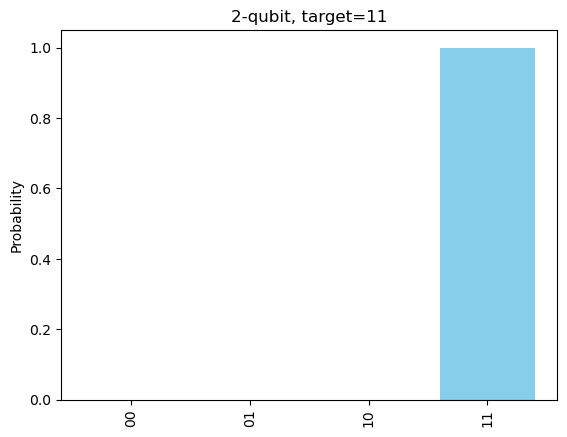

In [6]:
get_plot('11', DEGA([0,0,1,1])[1])